1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.
2. Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .
3. Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.
4. Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.
5. Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10i-й до (i+1)10 -й,... ,от 90 до 100-й точках (используйте осреднение по десяткам точек)
6. Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


C:\Users\alibe\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


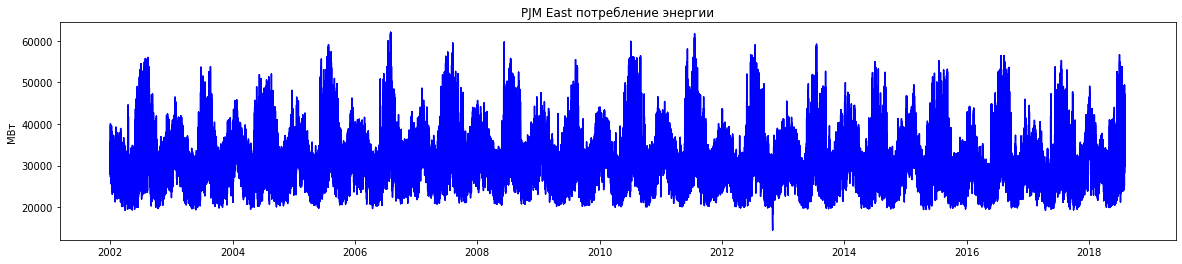

In [3]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [4]:
data_w = data.copy().resample('W').mean()
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


In [5]:
data_w.drop(['hour', 'dayofweek', 'dayofmonth', 'dayofyear'], axis=1,inplace=True)
data_w.head()

,PJME_MW,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,1.0,1.0,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,1.0,2.0,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,1.0,3.0,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,1.0,4.0,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,1.0,5.0,0.000000,0.000000,0.000000


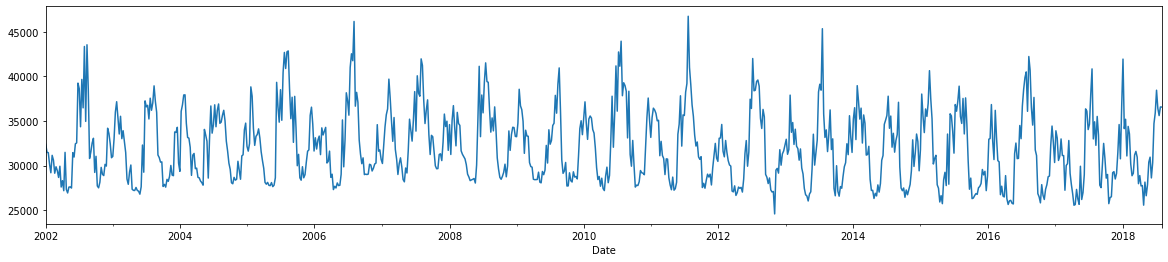

In [6]:
plt.figure(figsize =(20, 4))
data_w['PJME_MW'].plot()

In [7]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
pd.set_option('display.max_columns', None)

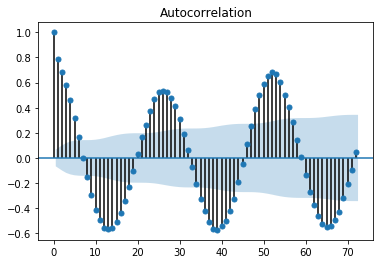

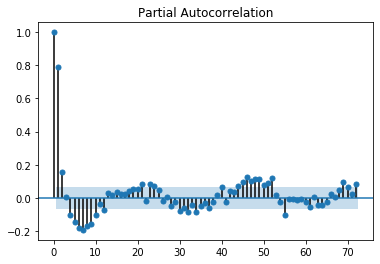

In [8]:
sm.graphics.tsa.plot_acf(data_w['PJME_MW'].values, lags=72)
sm.graphics.tsa.plot_pacf(data_w['PJME_MW'].values, lags=72)

plt.show()

In [9]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff

In [10]:
data_w['MA7']=data_w['PJME_MW'].rolling(window=7).mean()
data_w['MA13']=data_w['PJME_MW'].rolling(window=13).mean()

In [11]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [12]:
data_w['exp_0_01'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
data_w['exp_0_05'] = exponential_smoothing(data_w['PJME_MW'], 0.05)
data_w['exp_0_07'] = exponential_smoothing(data_w['PJME_MW'], 0.07)

In [13]:
p = 13
for i in range(p):
    data_w['t'+str(p-i)]=0
    data_w['t'+str(p-i)].values[p:] = data_w['PJME_MW'].values[i:-(p)+i]

In [14]:
data_w = data_w.iloc[13:,:]

In [15]:
data_w.head()

,PJME_MW,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,diff1,MA7,MA13,exp_0_01,exp_0_05,exp_0_07,t13,t12,t11,t10,t9,t8,t7,t6,t5,t4,t3,t2,t1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-04-07,28308.778443,2002.0,4.000000,2.0,14.0,0.0,0.0,0.0,712.909424,28994.138417,29769.564459,32066.690568,31029.892011,30638.743978,32392,31487,31452,30141,29196,31150,30616,29144,29869,29440,28672,29927,27595
2002-04-14,27182.482143,2002.0,4.000000,2.0,15.0,0.0,0.0,0.0,-1126.296265,28713.902873,29438.417939,32017.848483,30837.521517,30396.805650,31487,31452,30141,29196,31150,30616,29144,29869,29440,28672,29927,27595,28308
2002-04-21,31484.488095,2002.0,4.000000,2.0,16.0,0.0,0.0,0.0,4302.005859,28944.685186,29440.849258,32012.514880,30869.869846,30472.943421,31452,30141,29196,31150,30616,29144,29869,29440,28672,29927,27595,28308,27182
2002-04-28,27316.886905,2002.0,4.000000,2.0,17.0,0.0,0.0,0.0,-4167.601074,28641.253213,29223.569038,31965.558600,30692.220699,30252.019465,30141,29196,31150,30616,29144,29869,29440,28672,29927,27595,28308,27182,31484
2002-05-05,26929.482143,2002.0,4.714286,2.0,18.0,0.0,0.0,0.0,-387.404755,28392.210696,29049.183964,31915.197835,30504.083771,30019.441852,29196,31150,30616,29144,29869,29440,28672,29927,27595,28308,27182,31484,27316


In [16]:
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

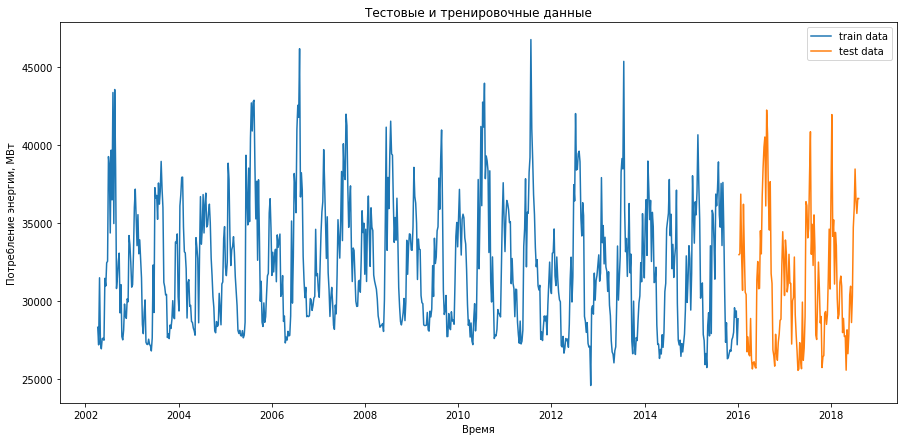

In [17]:
train, test = split_data( data_w, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [18]:
h = 4

X_train = train.iloc[:-h,:]
y_train = train['PJME_MW'].values[h:]
X_test = test.iloc[:-h,:]
y_test = test['PJME_MW'].values[h:]

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
model_g_4 = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [21]:
model_g_4.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
X_test.shape

(131, 27)

In [23]:
y_test_pred_g = model_g_4.predict(X_test)

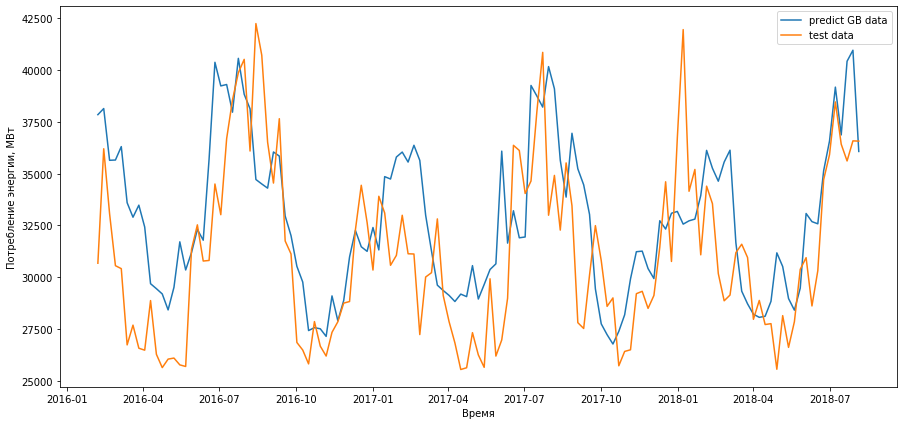

In [24]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h:],y_test, label='test data')

plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [26]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   13119405.945879007 
ошибка mae  :   2927.6082813624325 
оценка R2 :   0.21782972590415972


In [27]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
er_g = mean_absolute_percentage_error(y_test, y_test_pred_g)

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   9.636274127489694 %


In [29]:
h = 1

X_train = train.iloc[:-h,:]
y_train = train['PJME_MW'].values[h:]
X_test = test.iloc[:-h,:]
y_test = test['PJME_MW'].values[h:]

In [30]:
model_g_1 = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [31]:
model_g_1.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
y_test_pred_g = model_g_1.predict(X_test)

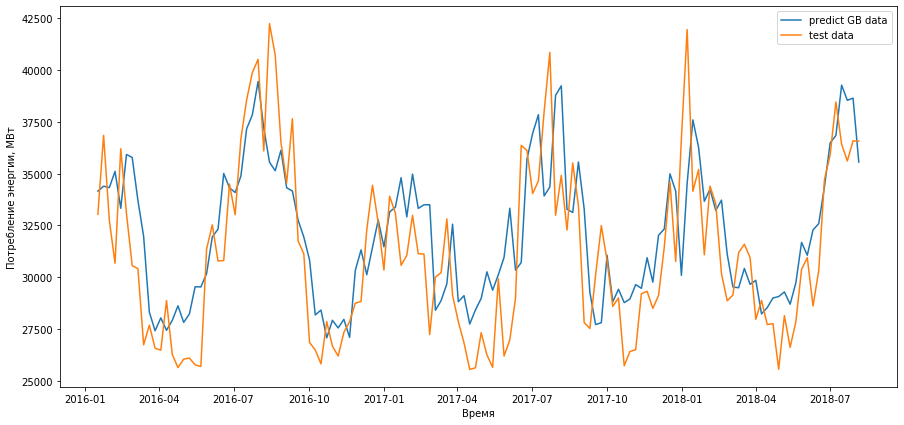

In [33]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h:],y_test, label='test data')

plt.legend()
plt.show()

In [34]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   7926428.78068365 
ошибка mae  :   2269.940942282883 
оценка R2 :   0.5249606896041555


In [35]:
er_g = mean_absolute_percentage_error(y_test, y_test_pred_g)

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.356234729955752 %


In [50]:
X_test_100.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134 entries, 2016-01-10 to 2018-07-29
Freq: W-SUN
Data columns (total 27 columns):
PJME_MW            134 non-null float64
year               134 non-null float64
month              134 non-null float64
quarter            134 non-null float64
weekofyear         134 non-null float64
is_holiday         134 non-null float64
is_prev_holiday    134 non-null float64
is_next_holiday    134 non-null float64
diff1              134 non-null float64
MA7                134 non-null float64
MA13               134 non-null float64
exp_0_01           134 non-null float64
exp_0_05           134 non-null float64
exp_0_07           134 non-null float64
t13                134 non-null int64
t12                134 non-null int64
t11                134 non-null int64
t10                134 non-null int64
t9                 134 non-null int64
t8                 134 non-null int64
t7                 134 non-null int64
t6                 134 non-null int64


In [62]:
X_test_100 = X_test.copy()
y_test_100 = y_test_pred_g.copy()
N10 = 10
for i in range(N10):
                                   
    X_test_100.loc[i+1,'PJME_MW'] = model_g_1.predict(X_test_100.loc[i,:].values.reshape(1, -1) )
    #строим 'exp'
    X_test_100.loc[i+1,'exp_0_01'] = X_test_100.loc[i,'exp_0_01']*(1-0.01)+ 0.01 * X_test_100[i+1,0] 
    X_test_100.loc[i+1,'exp_0_05'] = X_test_100.loc[i,'exp_0_05']*(1-0.05)+ 0.05 * X_test_100[i+1,0] 
    X_test_100.loc[i+1,'exp_0_07'] = X_test_100.loc[i,'exp_0_07']*(1-0.07)+ 0.07 * X_test_100[i+1,0] 
    #строим 'moving average'
    X_test_100.loc[i+1,'MA7'] = X_test['PJME_MW'].rolling(window=7).mean().loc[i+1]
    X_test_100.loc[i+1,'MA13'] = X_test['PJME_MW'].rolling(window=13).mean().loc[i+1]
    
for j in range(p):
    X_test_100['t'+str(p-j)]=0
    X_test_100['t'+str(p-j)].values[p:] = X_test_100['PJME_MW'].values[j:-(p)+j] 

TypeError: cannot do index indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [0] of <class 'int'>

In [ ]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')

plt.legend()
plt.show()  